In [67]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import numpy as np
from path import Path
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


In [68]:
# Data loading
file_path = Path("./Resources/crypto_data.csv");
df_crypto = pd.read_csv(file_path);
df_crypto.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [69]:
df_crypto.shape

(1252, 7)

In [70]:
# filter for currencies that are currently being traded
df_crypto = df_crypto.loc[df_crypto['IsTrading'] == True];
df_crypto.shape

(1144, 7)

In [71]:
#drop the `IsTrading` column from the dataframe
df_crypto = df_crypto.drop(['IsTrading'],axis=1);
df_crypto.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [72]:
#Remove all rows that have at least one null value
df_crypto = df_crypto.dropna(how='any');
df_crypto.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [73]:
df_crypto.shape

(685, 6)

In [74]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df_crypto = df_crypto.loc[df_crypto['TotalCoinsMined'] > 0];
df_crypto.shape

(532, 6)

In [75]:
df_crypto.head(10)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
13,ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [76]:
#delete the `CoinName` from the dataframe.
df_crypto = df_crypto.drop(['CoinName'],axis=1);
df_crypto.head(10)

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
9,LTC,Scrypt,PoW,6.303924e+07,84000000
10,DASH,X11,PoW/PoS,9.031294e+06,22000000
11,XMR,CryptoNight-V7,PoW,1.720114e+07,0
12,ETC,Ethash,PoW,1.133597e+08,210000000
13,ZEC,Equihash,PoW,7.383056e+06,21000000


In [77]:
#reset index
df_crypto =df_crypto.set_index('Unnamed: 0');

In [78]:
df_crypto.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000


In [79]:
#df_crypto.shape
df_crypto.count()

Algorithm          532
ProofType          532
TotalCoinsMined    532
TotalCoinSupply    532
dtype: int64

In [80]:
#Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data.
X_dummies= pd.get_dummies(data=df_crypto, columns=['Algorithm', 'ProofType'])
X_dummies.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X_dummies.shape

(532, 98)

In [83]:
#Standardize the dataset 
X_scaled = StandardScaler().fit_transform(X_dummies)

In [84]:
print(X_scaled)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


In [85]:
#Perform dimensionality reduction with PCA. Preserve 90% of the explained variance in dimensionality reduction. 
pca = PCA(n_components=.90)
X_pca = pca.fit_transform(X_scaled)


In [93]:
pca.explained_variance_.sum()

88.47283457566152

In [94]:
X_pca.shape

(532, 74)

In [95]:
#further reduce the dataset dimensions with t-SNE 
tsne = TSNE(perplexity=50,learning_rate=35)
X_tsne = tsne.fit_transform(X_pca)


In [96]:
X_tsne.shape

(532, 2)

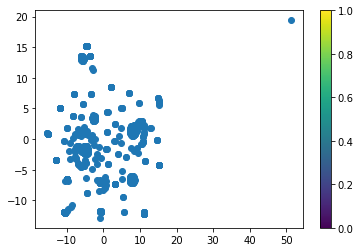

In [107]:
#create a scatter plot of the t-SNE output
plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.colorbar()
plt.show()

In [115]:
#Use a for-loop to determine the inertia for each `k` between 1 through 10
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

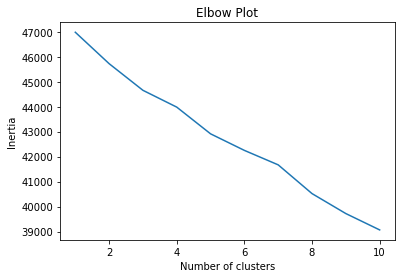

In [116]:
#Create an elbow plot
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.title('Elbow Plot')
plt.show()

In [114]:
print(elbow_df)

    k       inertia
0   1  46979.075160
1   2  45721.571493
2   3  44845.498015
3   4  44113.362080
4   5  43054.920982
5   6  42482.844846
6   7  41380.752099
7   8  40999.730708
8   9  39383.300024
9  10  39446.301091
